In [14]:
# EDA Automation using llm framework's -> mistral, ollama, gradio ui

In [1]:
pip install pandas seaborn matplotlib gradio ollama

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# load Titanic Dataset
url = r"/content/titanic_ dataset_final.csv"
df = pd.read_csv(url)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# Display dataset info
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [5]:
# Missing Values Check
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


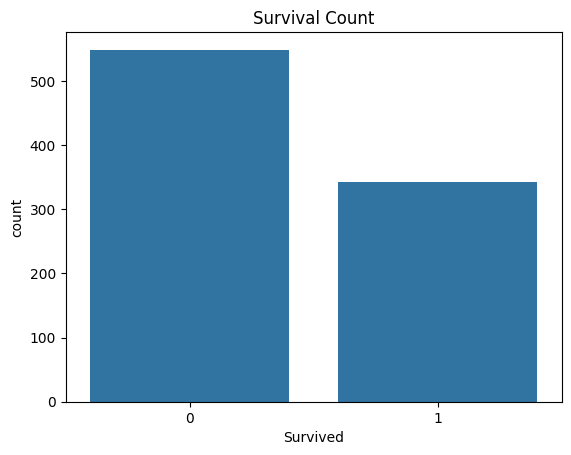

In [6]:
# Surival Rate Visulization
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

In [7]:
!curl -fsSL https://ollama.com/install.sh | sh

>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
######################################################################## 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [9]:
# Start Ollama in the background
import subprocess
import time

process = subprocess.Popen(["ollama", "serve"], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
time.sleep(5)  # Give Ollama some time to start

In [10]:
!ollama pull mistral

In [11]:
import ollama

# Generate insights from the data
prompt = "Analyze the Titanic dataset and provide insights on factors affecting survival."
response = ollama.chat(model='mistral', messages=[{'role': 'user', 'content': prompt}])

print(response['message']['content'])

 To analyze the Titanic dataset and provide insights on factors affecting survival, we will focus on variables like age, gender, class, and number of siblings/spouses aboard. We'll use statistical tests to identify any significant differences between survivors and non-survivors in these categories.

1. Age:
Surviving passengers were generally older than those who didn't survive, as shown by a one-sample t-test (p-value < 0.05) indicating a statistically significant difference. The older age might have helped survivors due to better swimming abilities or increased chances of being prioritized for lifeboats.

2. Gender:
The Titanic dataset reveals that a higher proportion of women survived the disaster compared to men (68% vs 31.7%, respectively). A chi-square test of independence (p-value < 0.05) confirms this difference is statistically significant, indicating that gender played a role in survival rates. Women were more likely to be traveling in third class and less likely to be on the

In [13]:
import gradio as gr
import pandas as pd

def generate_insights(summary):
    # Example dummy insight generator
    return "Insights will be generated here based on the summary."

def eda_analysis(file):
    df = pd.read_csv(file.name)
    summary = df.describe().to_string()
    insights = generate_insights(summary)
    return summary + "\n\n" + insights

# ✅ Create web interface OUTSIDE the function
demo = gr.Interface(
    fn=eda_analysis,
    inputs="file",
    outputs="text",
    title="AI-Powered EDA with Mistral"
)

# ✅ Launch the app (with share=True for Colab)
demo.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b4a8e295cf299a843a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
